In [4]:
import pandas as pd


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk

In [6]:
path = r"insurance.csv"
df = pd.read_csv(path)

In [7]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.shape

(1338, 7)

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df["smoker"].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [14]:
df["region"].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [15]:
df["sex"].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [16]:
df["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [17]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [18]:
df.isnull().sum()
df.duplicated().sum()

1

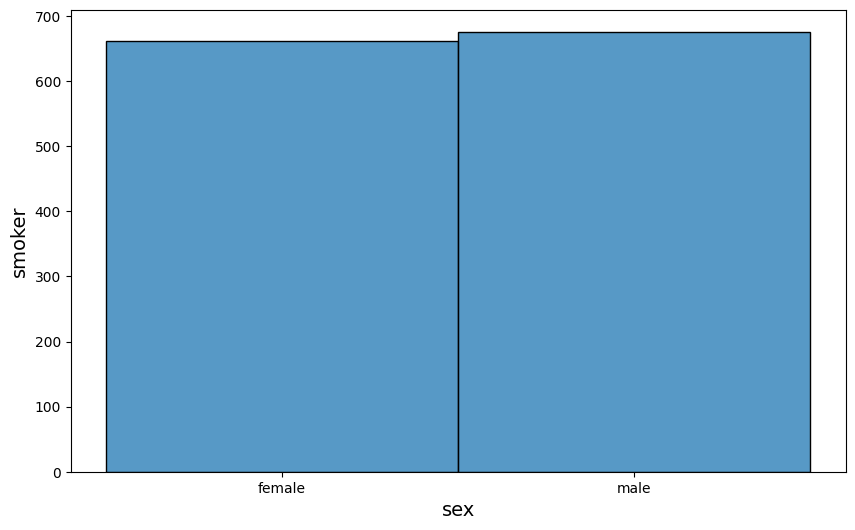

In [19]:
plt.figure(figsize=(10,6))
sb.histplot(df.sex)
plt.title('',size=18)
plt.xlabel('sex',size=14)
plt.ylabel('smoker',size=14)
plt.show()

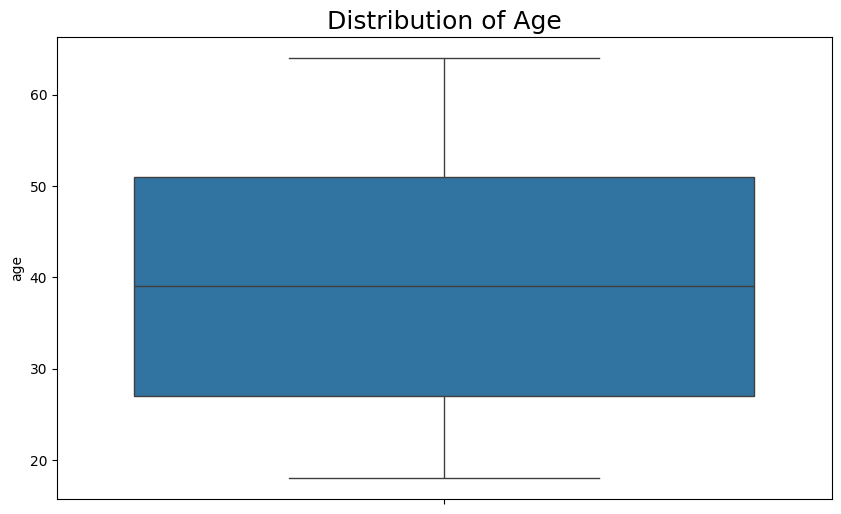

In [20]:
plt.figure(figsize = (10,6))
sb.boxplot(df.age)
plt.title('Distribution of Age',size=18)
plt.show()

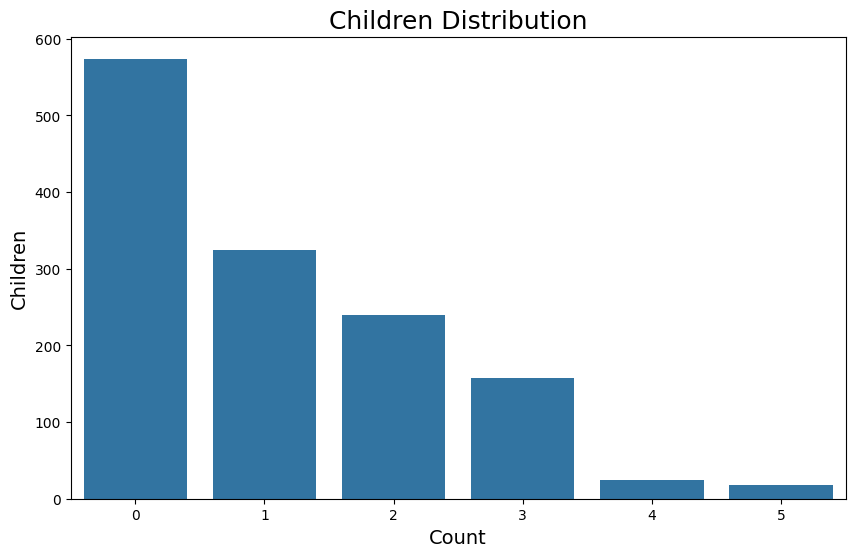

In [21]:
plt.figure(figsize = (10,6))
sb.countplot(x="children", data=df)
plt.title('Children Distribution',size=18)
plt.xlabel('Count',size=14)
plt.ylabel('Children',size=14)
plt.show()

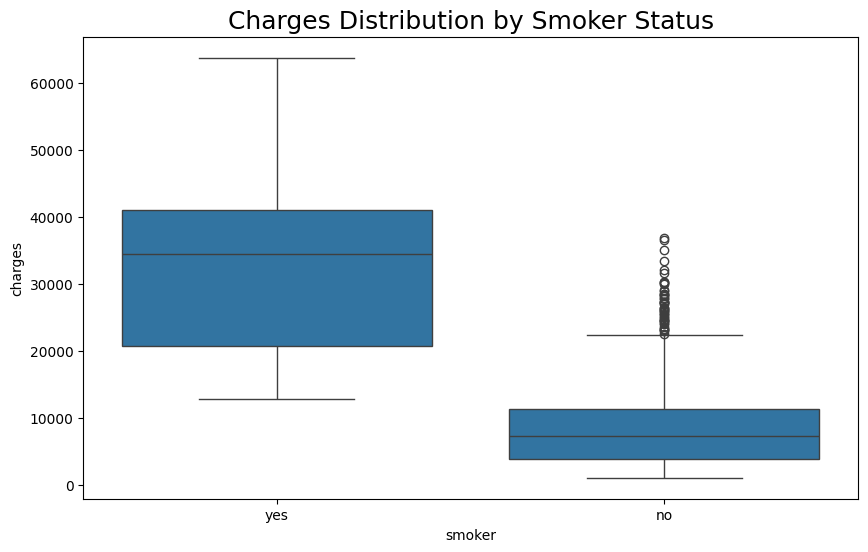

In [22]:
plt.figure(figsize = (10,6))
sb.boxplot(x=df.smoker, y=df.charges)
plt.title('Charges Distribution by Smoker Status',size=18)
plt.show()

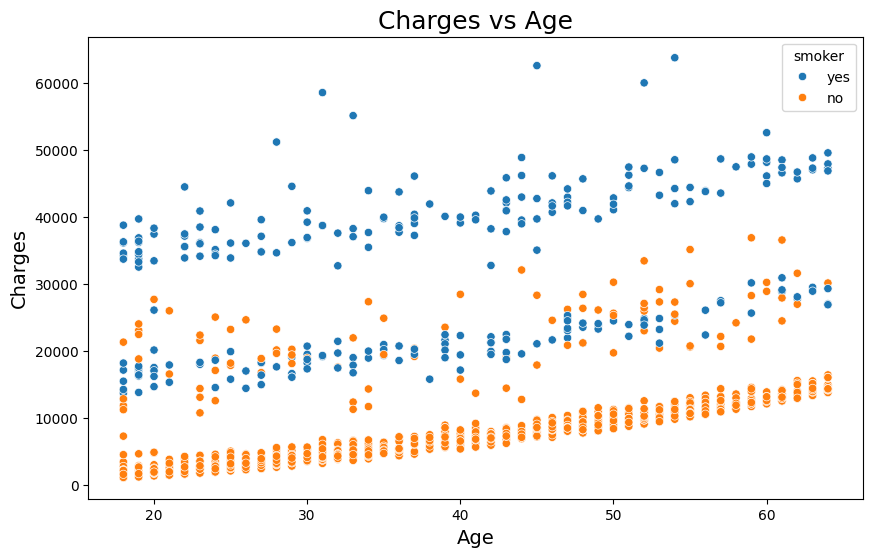

In [23]:
plt.figure(figsize = (10,6))
sb.scatterplot(x=df.age, y=df.charges, hue=df.smoker)
plt.title('Charges vs Age',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

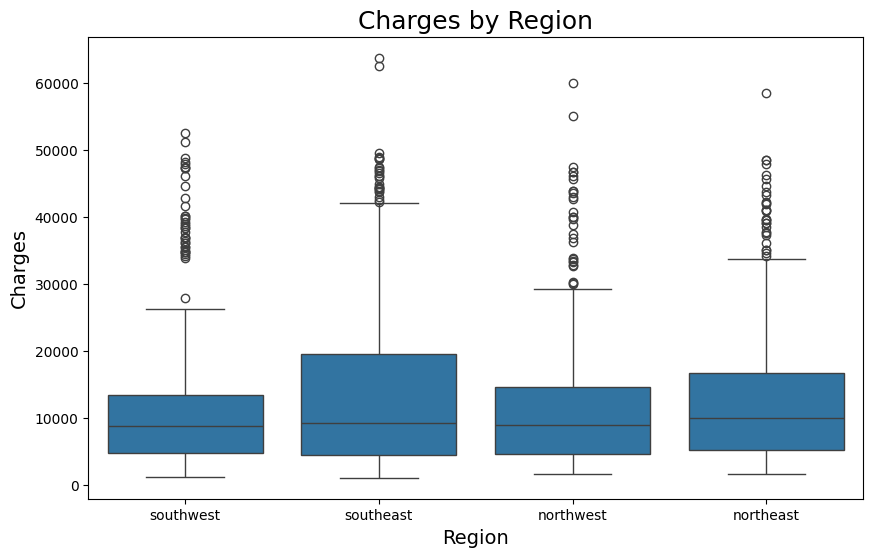

In [24]:
plt.figure(figsize=(10,6))
sb.boxplot(x=df.region, y=df.charges)
plt.title('Charges by Region',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Charges',size=14)
plt.show()

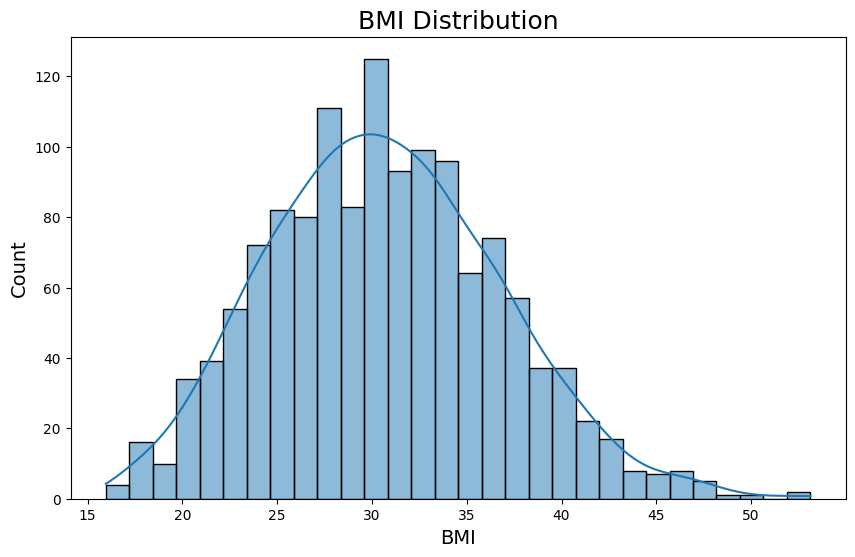

In [25]:
plt.figure(figsize=(10,6))
sb.histplot(df.bmi, bins=30, kde=True)
plt.title('BMI Distribution',size=18)
plt.xlabel('BMI',size=14)
plt.ylabel('Count',size=14)
plt.show()

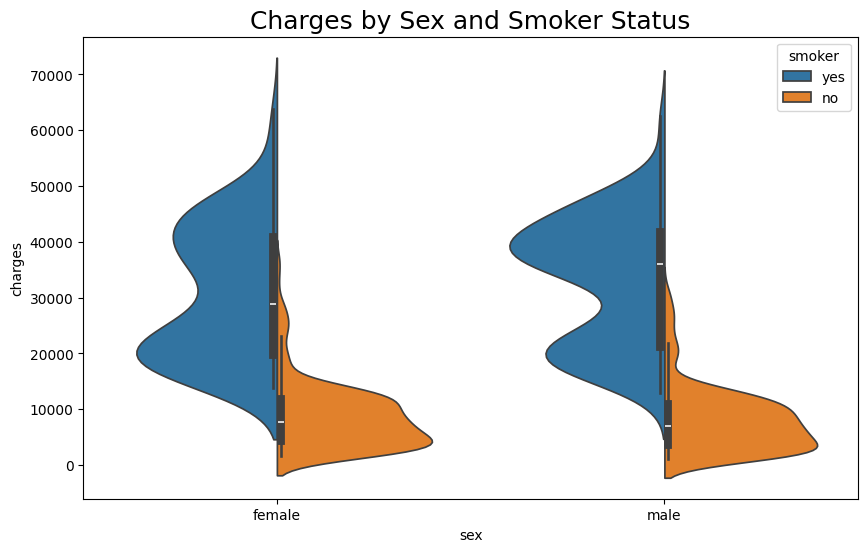

In [26]:
plt.figure(figsize=(10,6))
sb.violinplot(x=df.sex, y=df.charges, hue=df.smoker, split=True)
plt.title('Charges by Sex and Smoker Status',size=18)
plt.show()

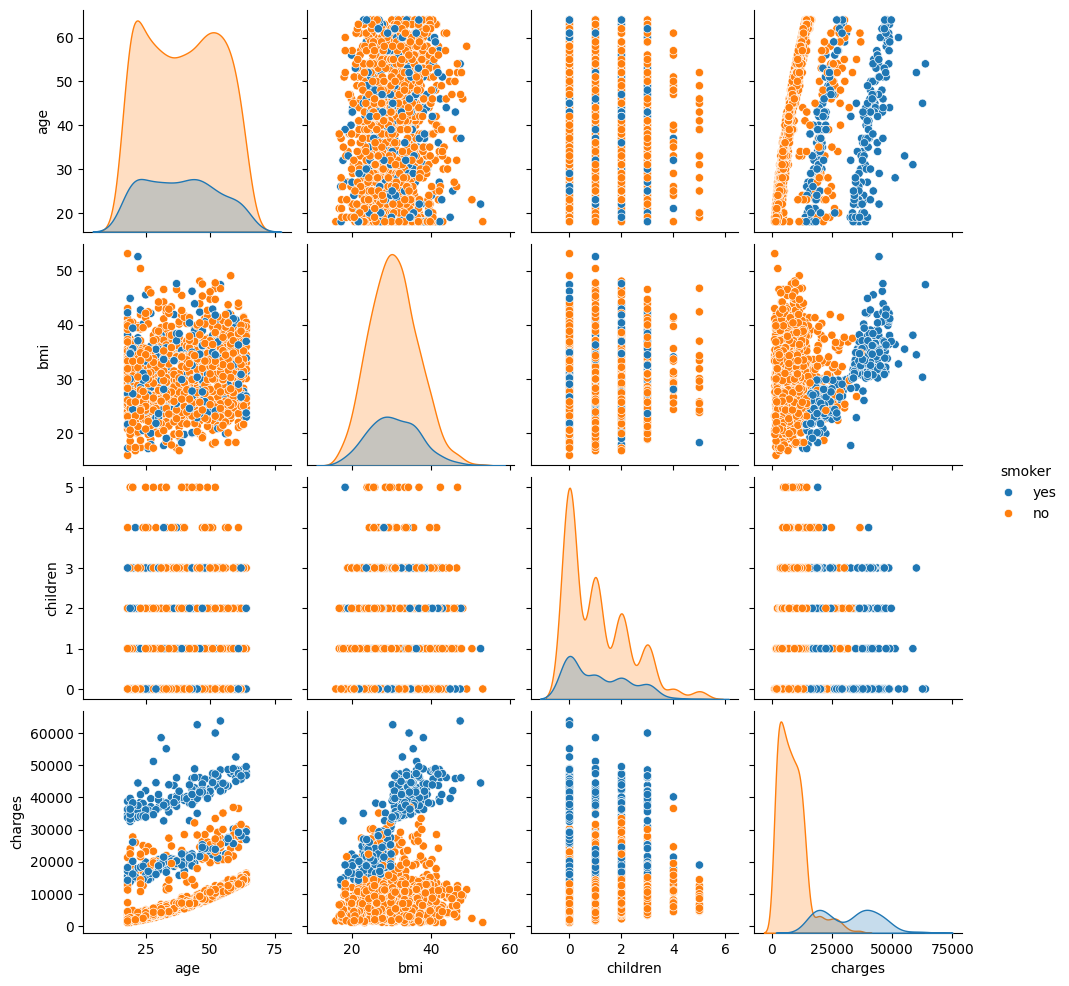

In [27]:
sb.pairplot(df, hue='smoker')
plt.show()

In [28]:
df.groupby('region')["charges"].mean()
df.groupby(["smoker", "sex"])["charges"].mean()

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

In [29]:
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

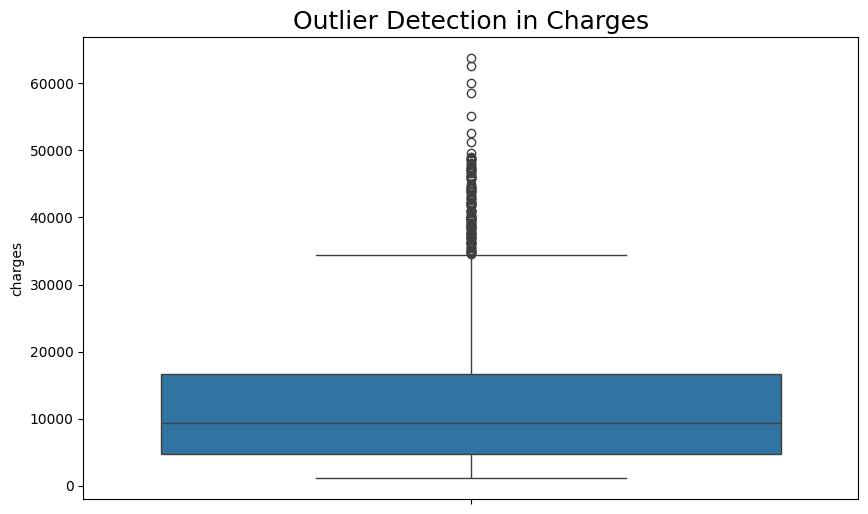

In [30]:
plt.figure(figsize=(10,6))
sb.boxplot(df.charges)
plt.title('Outlier Detection in Charges',size=18)
plt.show()

<Figure size 1000x600 with 0 Axes>

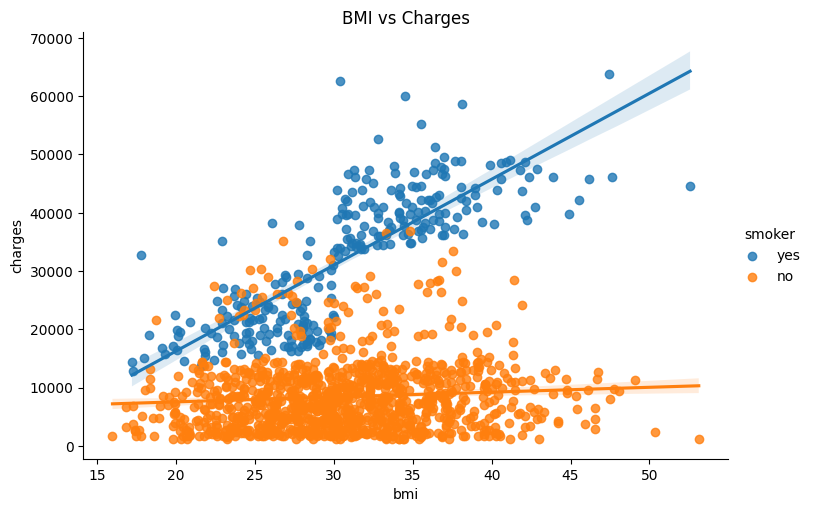

In [31]:
plt.figure(figsize=(10,6))
sb.lmplot(x='bmi', y='charges', hue='smoker', data=df, aspect=1.5)
plt.title('BMI vs Charges')
plt.show()